## **Series de tiempo**

Para esta práctica trabajaremos con un dataset de temperaturas de la Ciudad Autónoma de Buenos Aires.

Es fundamental que, como data scientist, conozcamos en detalle las funcionalidades y características que nos brinda el módulo `datetime` provisto por Python. En esta línea, aconsejamos revisar y tener como fuente de consulta el siguiente [link](https://realpython.com/python-datetime/). 

También, familiarizarnos con ella, nos hará más amena la tarea de trabajar con fechas en series de tiempo.

En esta primera práctica ahondaremos en cómo realizar un EDA en series de tiempo e indenfificar sus componentes.

En una segunda práctica haremos forecasting con `ARIMA`, dentro de los modelos clásicos estocásticos.

### 1. EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [2]:
data = pd.read_csv('..\Datasets\Clase_04_temperatura.csv')

In [3]:
data

,dia,mes,anio,Tmax,Tmin
0,1,1,1959,25.6,11.6
1,2,1,1959,26.2,16.4
2,3,1,1959,27.3,18.8
3,4,1,1959,25.4,16.6
4,5,1,1959,21.6,10.7
...,...,...,...,...,...
21709,9,6,2018,16.0,8.8
21710,10,6,2018,17.6,13.5
21711,11,6,2018,15.0,12.0
21712,12,6,2018,13.4,6.7


In [4]:
data.anio.max() - data.anio.min() # o data["anio"].max()

59

Tenemos una `frecuencia de muestreo` diaria y una `ventana temporal` con un tamaño de 59 años

Tenemos la información suficiente como para crear el campo `fecha`. Veamos cómo hacerlo:

In [5]:
{'year':data.anio, 'month': data.mes, 'day': data.dia}

{'year': 0        1959
 1        1959
 2        1959
 3        1959
 4        1959
          ... 
 21709    2018
 21710    2018
 21711    2018
 21712    2018
 21713    2018
 Name: anio, Length: 21714, dtype: int64,
 'month': 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 21709    6
 21710    6
 21711    6
 21712    6
 21713    6
 Name: mes, Length: 21714, dtype: int64,
 'day': 0         1
 1         2
 2         3
 3         4
 4         5
          ..
 21709     9
 21710    10
 21711    11
 21712    12
 21713    13
 Name: dia, Length: 21714, dtype: int64}

In [6]:
data['fecha'] = pd.to_datetime({'year':data.anio, 'month': data.mes, 'day': data.dia}) 

In [7]:
data.head(3)

,dia,mes,anio,Tmax,Tmin,fecha
0,1,1,1959,25.6,11.6,1959-01-01
1,2,1,1959,26.2,16.4,1959-01-02
2,3,1,1959,27.3,18.8,1959-01-03


Ya no necesitamos las columnas que utilizamos para crear el campo fecha.

In [8]:
data.drop(columns= ['dia','mes', 'anio'], inplace = True)

Es momento de visualizar nuestra serie de tiempo.

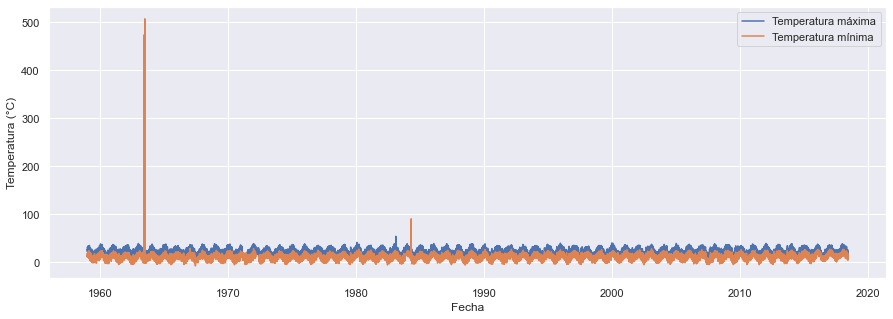

In [9]:
plt.figure(figsize = (15,5))

plt.plot(data.fecha, data.Tmax, label = 'Temperatura máxima')
plt.plot(data.fecha, data.Tmin, label = 'Temperatura mínima')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
#plt.ylim(-10,40)
plt.show()

Tenemos algunos outliers que nos amplían en demasía el valor máximo del eje Y. Probemos limitar el eje Y.

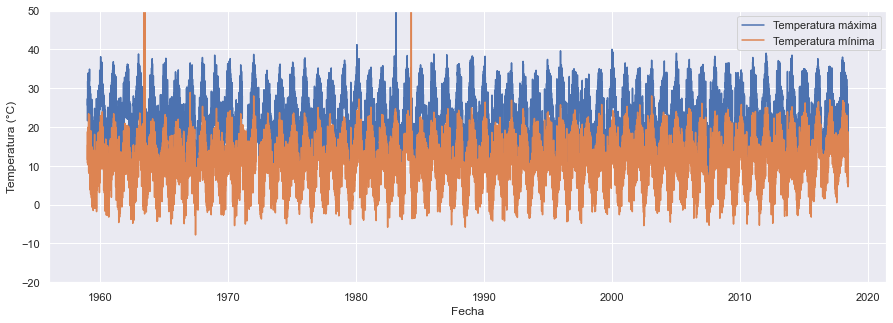

In [10]:
plt.figure(figsize = (15,5))

plt.plot(data.fecha, data.Tmax, label = 'Temperatura máxima')
plt.plot(data.fecha, data.Tmin, label = 'Temperatura mínima')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.ylim(-20,50)
plt.show()

Como recordarán de lo visto en la clase teórica, cuando tenemos una frecuencia de muestreo relativamente chica en una ventana temporal grande corremos el riesgo de que, al querer graficarla, obtengamos una serie muy distorsionada o saturada. Para ello, recurríamos al `resampleo`.

Probemos reaugrupar o resumir nuestros datos en una frecuencia de muestreo más grande -semanal o mensual-.

In [11]:
# Agrupamos nuestras mediciones por el promedio semanal

semanal = data.resample('W', on = 'fecha').mean()
semanal.head()

,Tmax,Tmin
fecha,,
1959-01-04,26.125000,15.850000
1959-01-11,26.600000,12.785714
1959-01-18,28.300000,16.885714
1959-01-25,31.300000,16.400000
1959-02-01,27.633333,16.014286


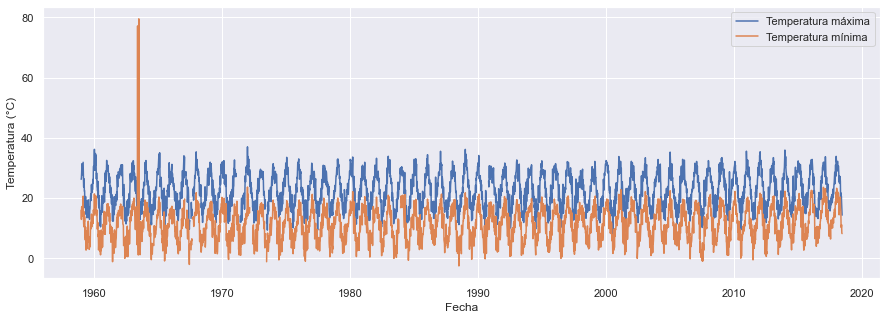

In [12]:
plt.figure(figsize = (15,5))

plt.plot(semanal.index, semanal.Tmax, label = 'Temperatura máxima')
plt.plot(semanal.index, semanal.Tmin, label = 'Temperatura mínima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
#plt.ylim(-10,40)
plt.legend()
plt.show()

Mejoró un poco, ¿verdad? 

Comenten la línea `plt.ylim(-10,40)` y noten un detalle respecto a la primera visualuzación que hicimos. Ahora, nuestro pico del outlier más alto ya no está en torno a los 500º sino cercano a los 80º ¿Por qué creés que sucedió esto?

In [13]:
# Ahora veamos qué pasa si reagrupamos las temperaturas mensualmente.

mensual = data.resample('M', on = 'fecha').mean()
mensual.head()

,Tmax,Tmin
fecha,,
1959-01-31,28.183871,15.554839
1959-02-28,NaN,16.832143
1959-03-31,25.606452,13.861290
1959-04-30,19.143333,9.946667
1959-05-31,17.270968,6.367742


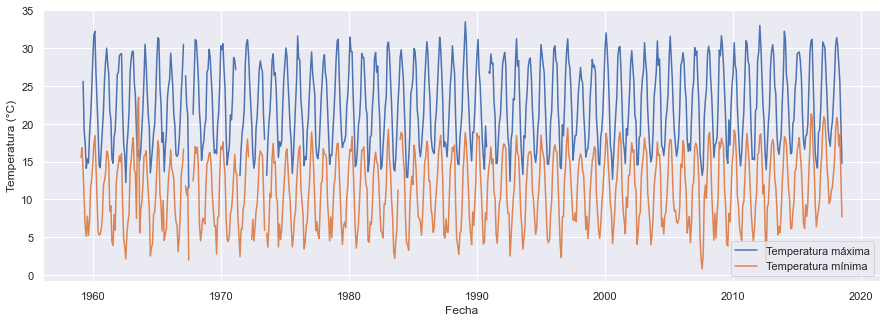

In [14]:
plt.figure(figsize = (15,5))

plt.plot(mensual.index, mensual.Tmax, label = 'Temperatura máxima')
plt.plot(mensual.index, mensual.Tmin, label = 'Temperatura mínima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
#plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))

plt.legend()
plt.show()

En este caso, ya no es necesario limitar el eje Y por la miniaturización del gráfico que probocaba nuestro punto máximo.

Práctiquemos un caso de uso la librería `datetime` para limitar el periodo temporal que queremos abarcar de nuestra serie.

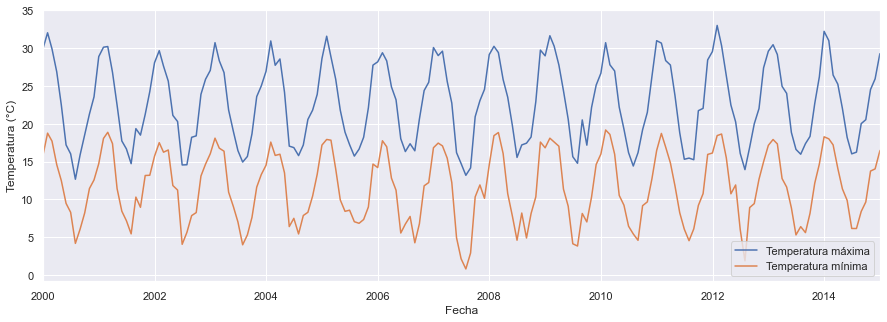

In [15]:
plt.figure(figsize = (15,5))

plt.plot(mensual.index, mensual.Tmax, label = 'Temperatura máxima')
plt.plot(mensual.index, mensual.Tmin, label = 'Temperatura mínima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.xlim(datetime.date(2000,1,1), datetime.date(2015,1,1))

plt.legend()
plt.show()

### **`Componentes de la serie de tiempo`**

Veremos dos formas de obtenerlas: *media móvil* y *regresión lineal*.

***Media móvil***

Aquí utilizaremos la función *rolling window*. Fijaremos una ventana que define la cantidad de registros anteriores + actual para realizar el promedio en la fila actual.

Vamos a sacar algunos valores de medición y, a su vez, rellenar los faltantes.

In [16]:
semanal.Tmin[semanal.Tmin > 50] = np.nan

In [17]:
# Observamos cuántos faltantes tenemos

print(semanal.isnull().sum())

Tmax    39
Tmin    32
dtype: int64


In [18]:
# Imputamos faltantes con la función interpolate

semanal = semanal.interpolate()

Ahora vamos a obtener la temperatura promedio semanal -combinando las temperaturas mínimas y máximas-.

In [19]:
semanal['Tmean'] = (semanal.Tmax + semanal.Tmin)/2

In [20]:
semanal.head(3)

,Tmax,Tmin,Tmean
fecha,,,
1959-01-04,26.125,15.850000,20.987500
1959-01-11,26.600,12.785714,19.692857
1959-01-18,28.300,16.885714,22.592857


Pasemos a establecer el tamaño nuestra ventana móvil:

In [22]:
# Probar ir variando este valor donde elegimos la cantidad de semanas con la que se irá calculando la media

ventana = (105)

In [26]:
semanal_promedio_tendencia = semanal.Tmean.rolling(window=ventana, center = True).mean()
semanal_promedio_tendencia.head(200)

fecha
1959-01-04          NaN
1959-01-11          NaN
1959-01-18          NaN
1959-01-25          NaN
1959-02-01          NaN
                ...    
1962-09-30    16.410096
1962-10-07    16.395538
1962-10-14    16.397375
1962-10-21    16.355198
1962-10-28    16.342817
Freq: W-SUN, Name: Tmean, Length: 200, dtype: float64

*Cuanto más grande sea nuestra ventana, más valores necesitará para empezar a establecer valores y, por ende, más faltantes observemos en el dataframe*.

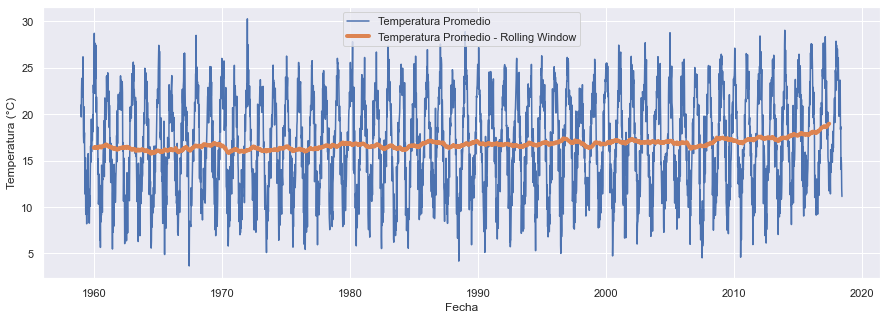

In [27]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.Tmean, label = 'Temperatura Promedio')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Temperatura Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

***Tendencia lineal***

Aquí ajustaremos una regresión lineal a la serie. Tomar en consideración que la aplicabilidad de este método es muy limitada a casos muy puntuales.

Como primer paso, no podemos utilizar una regresión lineal con el tipo de fechas que tenemos, por lo que habrá que pasarlas a un formato numérico.

In [30]:
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)

In [31]:
semanal.head()

,Tmax,Tmin,Tmean,fecha_numeros
fecha,,,,
1959-01-04,26.125000,15.850000,20.987500,715148
1959-01-11,26.600000,12.785714,19.692857,715155
1959-01-18,28.300000,16.885714,22.592857,715162
1959-01-25,31.300000,16.400000,23.850000,715169
1959-02-01,27.633333,16.014286,21.823810,715176


In [32]:
from sklearn.linear_model import LinearRegression

reg_lineal = LinearRegression() #Instanciamos el modelo

reg_lineal.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanal.Tmean) # Lo entrenamos

LinearRegression()

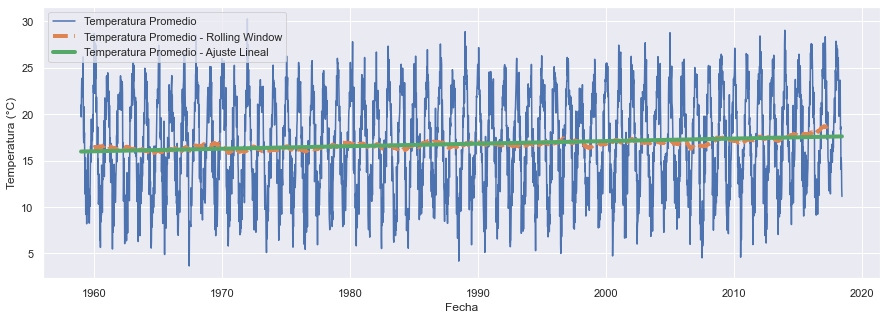

In [33]:
plt.figure(figsize = (15,5)) 

plt.plot(semanal.index, semanal.Tmean, label = 'Temperatura Promedio')
plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Temperatura Promedio - Rolling Window')
plt.plot(semanal.index, reg_lineal.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Temperatura Promedio - Ajuste Lineal')

plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

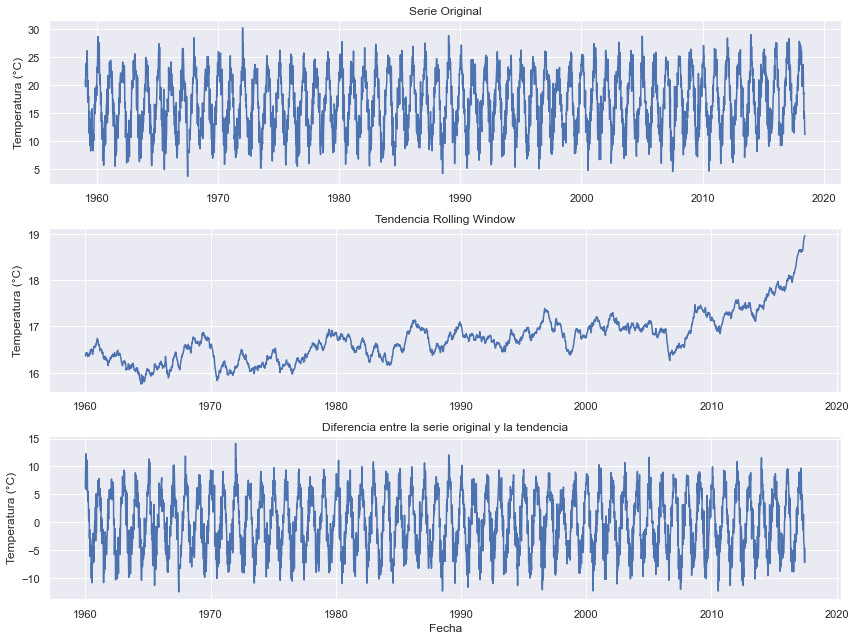

In [34]:
# Veamos las componentes

plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(semanal.index, semanal.Tmean)
plt.ylabel('Temperatura (°C)')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(semanal_promedio_tendencia)
plt.ylabel('Temperatura (°C)')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(semanal.index, semanal.Tmean - semanal_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')

plt.tight_layout()
plt.show()

***Estacionalidad***

En este caso, agrupamos los datos por mes y mostramos las distribuciones de cada grupo. De esta manera, se visualiza la estacionalidad anual. Podría buscarse, también, una estacionalidad mensual y agrupar los datos por día. Todo eso depende de los datos con los que estemos trabajando. Aquí, como estamos trabajando con temperaturas, al observar una estacionalidad anual podemos corroborar el patrón y la incidenciade las 4 estaciones del año en la temperatura promedio.

Text(0, 0.5, 'Temperatura')

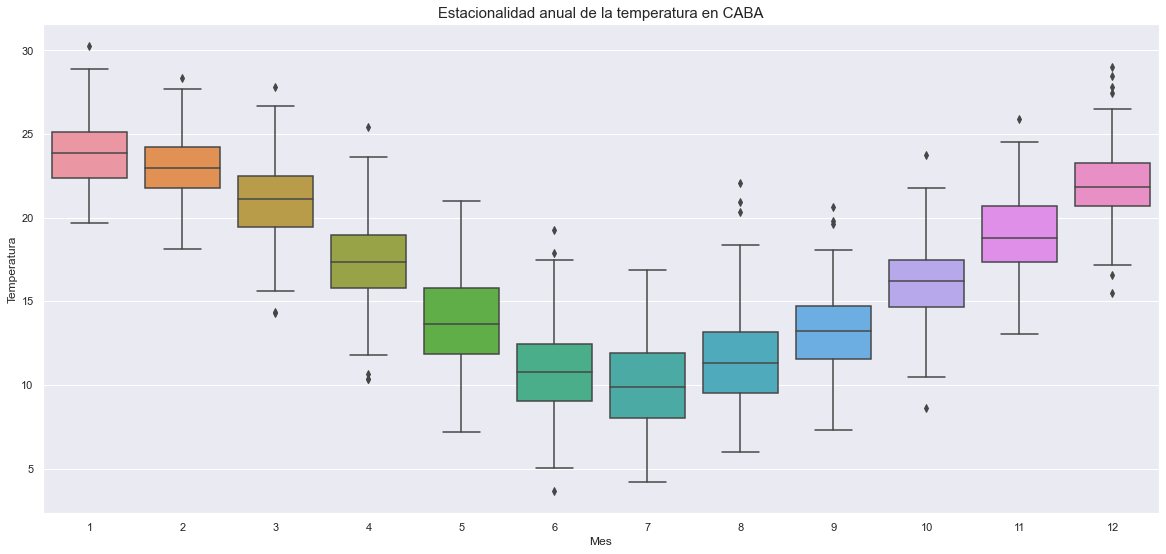

In [36]:
# Agrupamos los datos por mes y mostramos las distribuciones de cada grupo. De esta manera, se visualiza la estacionalidad anual.

plt.figure(figsize = (20,9))
sns.boxplot(data=semanal,x=semanal.index.month,y= semanal.Tmean)
plt.title('Estacionalidad anual de la temperatura en CABA', fontsize = 15)
plt.xlabel('Mes')
plt.ylabel('Temperatura')

Existen dos librerías muy importantes que nos permiten obtener las componentes de una serie de tiempo de manera más sencilla. 

Una es `stats model` y la otra `Prophet`.

Recomendamos ir familiarizándose con la primera de ellas.

***Stats model***

In [38]:
#import sys
#!{sys.executable} -m pip install statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(semanal.Tmean, model='additive') # y= t+s+u podría ser y=t*s*u

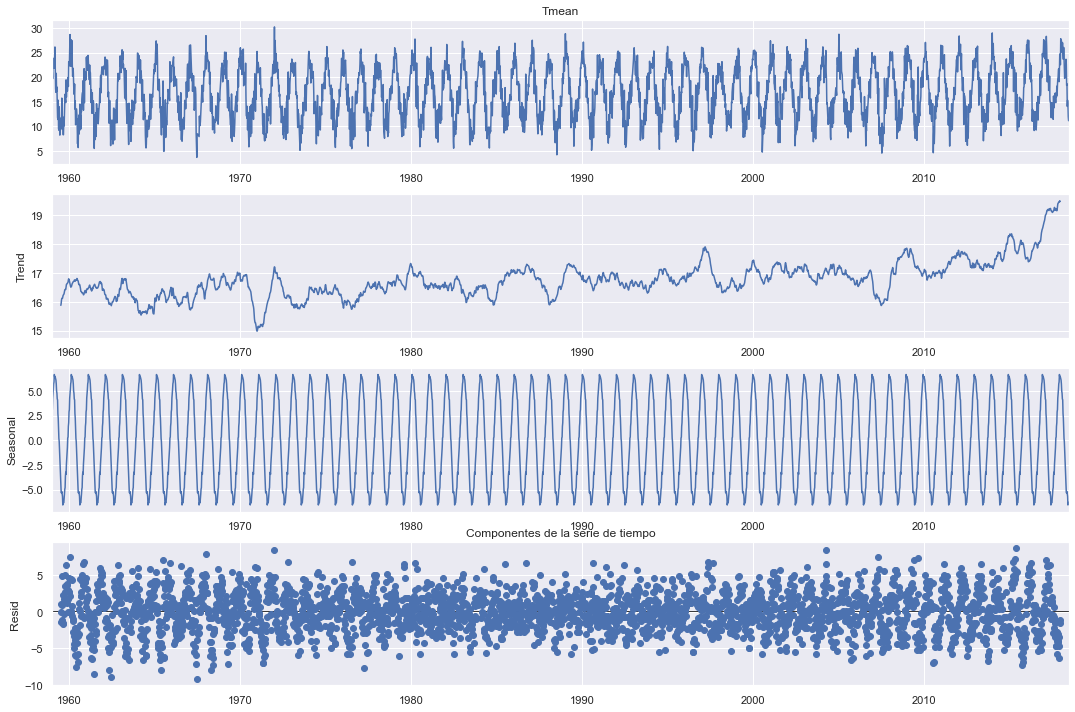

In [39]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,10]
result.plot()
plt.title('Componentes de la serie de tiempo')
plt.show()


In [31]:
#Exportamos el csv ya transformado
#semanal.drop(columns = 'fecha_numeros', inplace = True)
#semanal.to_csv('Clase_04_temperatura_transf.csv')